## Interference with polarization

In [398]:
import numpy as np
import matplotlib.pyplot as plt

In [399]:
# Define Jones vectors for the two beams
def jones_vector(amp, type ,phase_x, phase_y):

    if type == 'horizontal': 
        return np.array([
            1,  # X-component
            0   # Y-component
        ])
    elif type == 'vertical': 
        return np.array([
            0,  # X-component
            1   # Y-component
        ])
    else:
        return np.array([
           amp * np.exp(1j * phase_x),  # X-component
           amp * np.exp(1j * phase_y)   # Y-component
        ])

# Wave generatot for plane and spherical waves
def wave_generator(type1, type2, lambda1, lambda2, z1, z2, X, Y):
    k1 = 2 * np.pi / lambda1  
    k2 = 2 * np.pi / lambda2  

    if type1 == 'plane':
        phase_E1 = k1 * X       #Travelling along X-axis by default 
    elif type1 == 'spherical':
        phase_E1 = k1 * np.sqrt(X**2 + Y**2 + z1**2)
    
    if type2 == 'plane':    
        phase_E2 = k2 * Y       #Travelling along Y-axis by default 
    elif type2 == 'spherical':
        phase_E2 = k2 * np.sqrt(X**2 + Y**2 + z2**2)

    return phase_E1, phase_E2

In [394]:
# Parameters for beam 1
amp1 = 1             
phase_x1 = np.pi      
phase_y1 = 0  

# Parameters for beam 2
amp2 = 1             
phase_x2 = 0  
phase_y2 = np.pi  

# Define spatial grid for interference pattern
x = np.linspace(-20, 20, 500)   # x-coordinates
y = np.linspace(-20, 20, 500)   # y-coordinates
X, Y = np.meshgrid(x, y)


# Define wave numbers for both beams
wavelength1 =  0.75  #  μm wavelength
wavelength2 = 0.7   # μm wavelength
z1 = 5      # distance from the source (for spherical wave interference pattern)
z2 = 10    # distance from the source (for spherical wave interference pattern)


In [ ]:
# Create Jones vectors for both beams
E1 = jones_vector(amp1, 'horizontal' ,phase_x1, phase_y1)
E2 = jones_vector(amp2, 'horizontal' ,phase_x2, phase_y2)

phase_E1, phase_E2 = wave_generator(
    'spherical', 'spherical', wavelength1, wavelength2, z1, z2, X, Y
)

# Electric fields of the two beams at each (x, y) position
E_field_1 = np.array([
    E1[0] * np.exp(1j * phase_E1),  # X-component of beam 1
    E1[1] * np.exp(1j * phase_E1)   # Y-component of beam 1
])

E_field_2 = np.array([
    E2[0] * np.exp(1j * phase_E2),  # X-component of beam 2
    E2[1] * np.exp(1j * phase_E2)   # Y-component of beam 2
])


In [405]:
# Resultant field: sum of both fields
E_total = E_field_1 + E_field_2

# Calculate intensity as the squared magnitude of the resultant field
intensity = np.abs(E_total[0])**2 + np.abs(E_total[1])**2

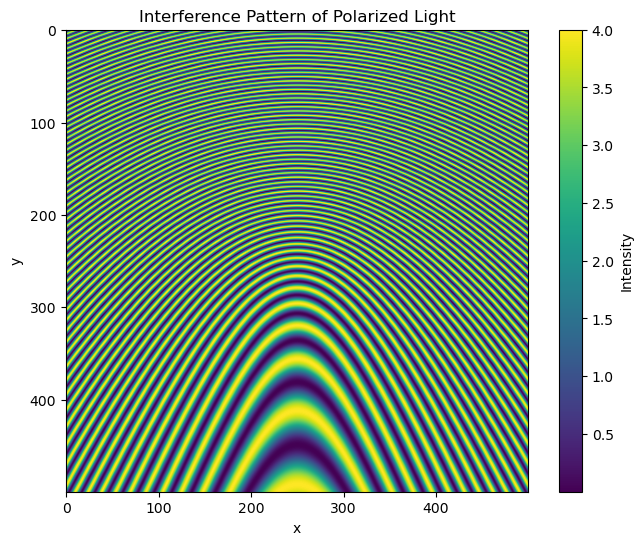

In [406]:
# Plot the resulting interference pattern
plt.figure(figsize=(8, 6))
plt.imshow(intensity, cmap='viridis')
plt.colorbar(label='Intensity')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interference Pattern of Polarized Light')
plt.show()